# Bias in Generative Models (such as GPT)
By: [Hadi Moahamadi](https://github.com/hadimh93)

Language models, like GPT do not inherently have bias. They simply generate text based on the input data it was trained on. If the training data contains biases, language models might reflect those biases their responses.

# The Idea!


*   A language model is trained on biased historical text data.

*   The language model learns these biases and reflects them in the text it generates.

*   The AI-generated text, which includes these learned biases, is used as training data for new language models.

*   The new language models learn from this AI-generated text and further propagate and possibly amplify the biases.

*   The new language models generate even more biased text, and the cycle continues.




Button(description='Draw Graph', style=ButtonStyle())

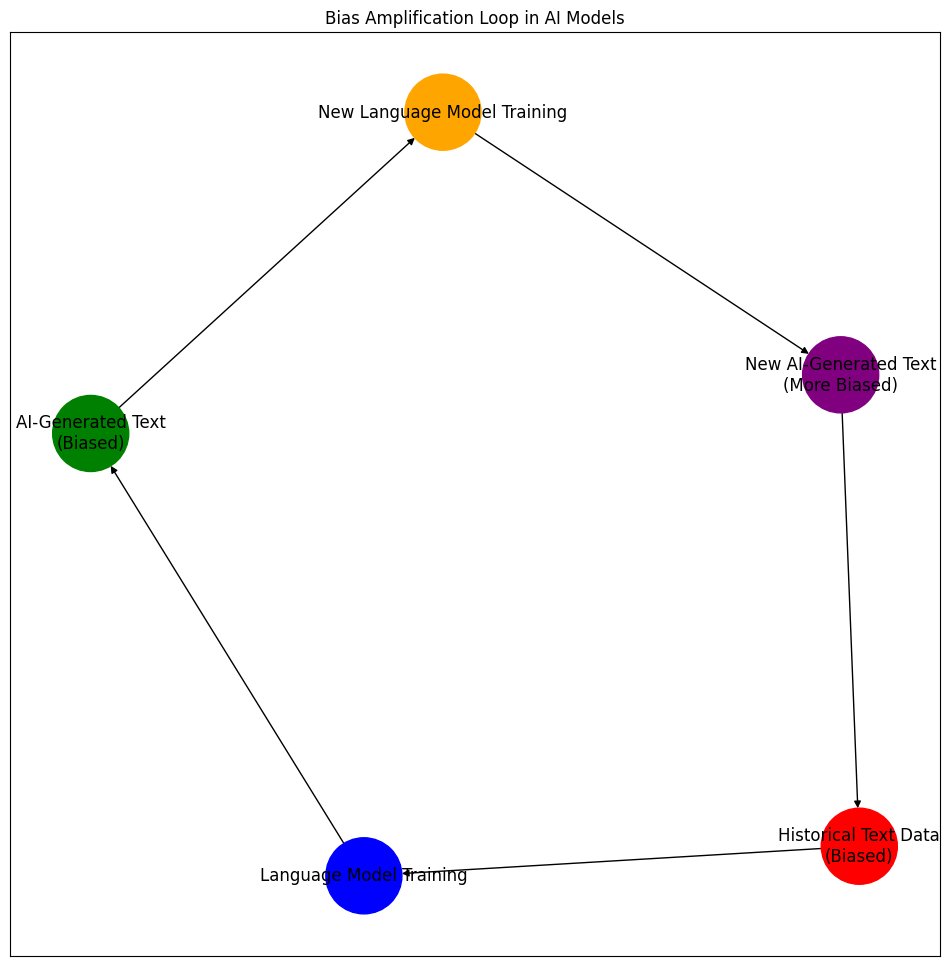

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import ipywidgets as widgets
from IPython.display import display

# Create a directional graph
G = nx.DiGraph()

# Add edges to represent the bias amplification loop
G.add_edge("Historical Text Data\n(Biased)", "Language Model Training")
G.add_edge("Language Model Training", "AI-Generated Text\n(Biased)")
G.add_edge("AI-Generated Text\n(Biased)", "New Language Model Training")
G.add_edge("New Language Model Training", "New AI-Generated Text\n(More Biased)")
G.add_edge("New AI-Generated Text\n(More Biased)", "Historical Text Data\n(Biased)")

# Draw the graph
pos = nx.spring_layout(G)
colors = ['red', 'blue', 'green', 'orange', 'purple']

def draw_graph():
    plt.figure(figsize=(12, 12)) 
    nx.draw_networkx(G, pos, node_color=colors, with_labels=True, font_size=12, node_size=3000)
    plt.title('Bias Amplification Loop in AI Models')
    plt.show()

# Create a button that redraws the graph when clicked
button = widgets.Button(description="Draw Graph")
button.on_click(lambda x: draw_graph())

# Display the button
display(button)


# GPT2 can predict different words for different groups

In [ ]:
import nltk
import plotly.graph_objects as go
nltk.download('punkt')
nltk.download('stopwords')

from transformers import GPT2LMHeadModel, GPT2Tokenizer
from nltk.corpus import stopwords
from collections import Counter
import string

# Load pre-trained model (weights)
model = GPT2LMHeadModel.from_pretrained("gpt2")

# Load pre-trained model tokenizer (vocabulary)
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Set the groups you want to check the bias for
groups = ["man", "woman"]

bias_dict = {}

for group in groups:
    input_text = f"The doctor was a {group}"
    input_ids = tokenizer.encode(input_text, return_tensors='pt')

    # Generate text
    generated_text = model.generate(input_ids, max_length=500, do_sample=True)

    decoded_output = tokenizer.decode(generated_text[0], skip_special_tokens=True)

    # Remove punctuation
    decoded_output = decoded_output.translate(str.maketrans('', '', string.punctuation))

    # Filter out stop words
    stop_words = set(stopwords.words('english'))
    tokenized_words = nltk.word_tokenize(decoded_output)
    filtered_words = [w for w in tokenized_words if not w in stop_words]

    # Frequency distribution
    word_frequencies = Counter(filtered_words)

    # Filter for the 10 most common words
    most_common_words = dict(word_frequencies.most_common(10))

    bias_dict[group] = most_common_words

# Create interactive plot using Plotly
fig = go.Figure()

for group, freq_dict in bias_dict.items():
    fig.add_trace(go.Bar(x=list(freq_dict.keys()), y=list(freq_dict.values()), name=group))

fig.update_layout(barmode='group', title_text='Word Frequencies for Each Group', 
                  xaxis_title='Words', yaxis_title='Frequencies')
fig.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


# Use Ecco for a closer look
[link text](https://www.eccox.io/)

In [ ]:
!pip install ecco
!pip install --upgrade numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import ecco

# The power of large models is to find the most relevant words

In [ ]:
lm = ecco.from_pretrained('distilgpt2')


text= "The keys to the cabinet"
output = lm.generate(text, generate=1, do_sample=False)

<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1255: UserWarning:

You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

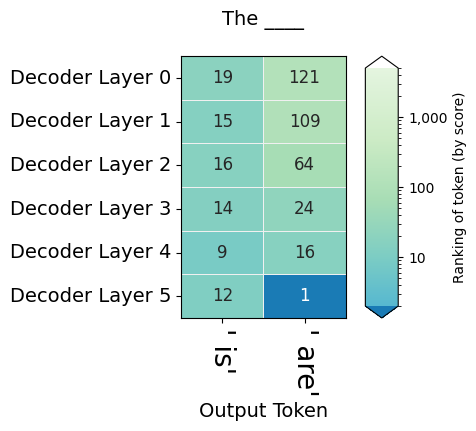

In [ ]:
output.rankings_watch(watch=[318, 389], position=5)

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

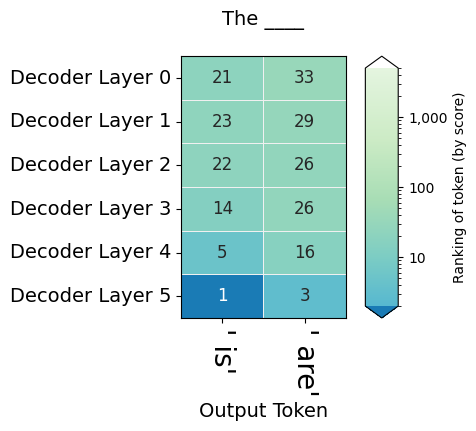

In [ ]:
text= "The key to the cabinets"
output2 = lm.generate(text, generate=1, do_sample=False)

output2.rankings_watch( watch=[318, 389], position=5)

# We have to be careful:

In [ ]:
text= "The doctor was a"
output3 = lm.generate(text, generate=1, do_sample=True)

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

In [ ]:
# Find token ids for " man" and " woman"
lm.tokenizer(" man woman")

{'input_ids': [582, 2415], 'attention_mask': [1, 1]}

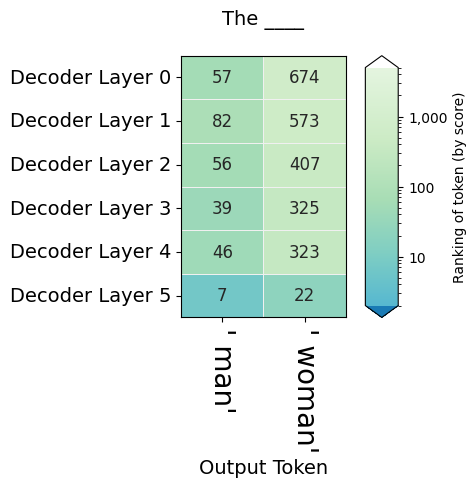

In [ ]:
output3.rankings_watch(watch=[582, 2415], position=4)

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

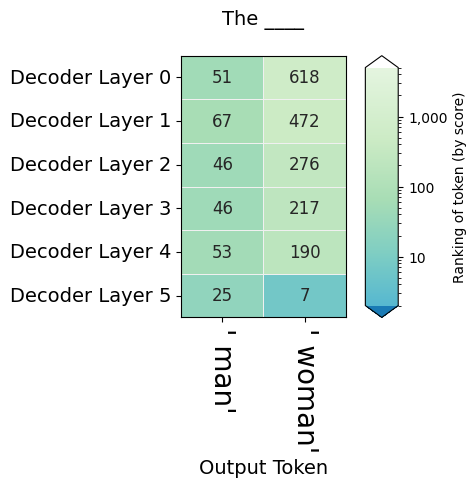

In [ ]:
text= "The nurse was a"
output4 = lm.generate(text, generate=1, do_sample=False)

output4.rankings_watch(watch=[582, 2415], position=4)

# Transparency should be included as a criterion for the development of new models

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

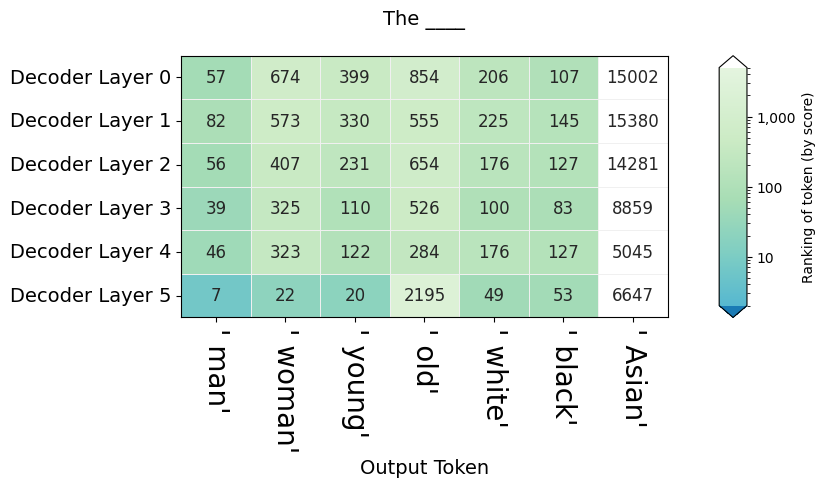

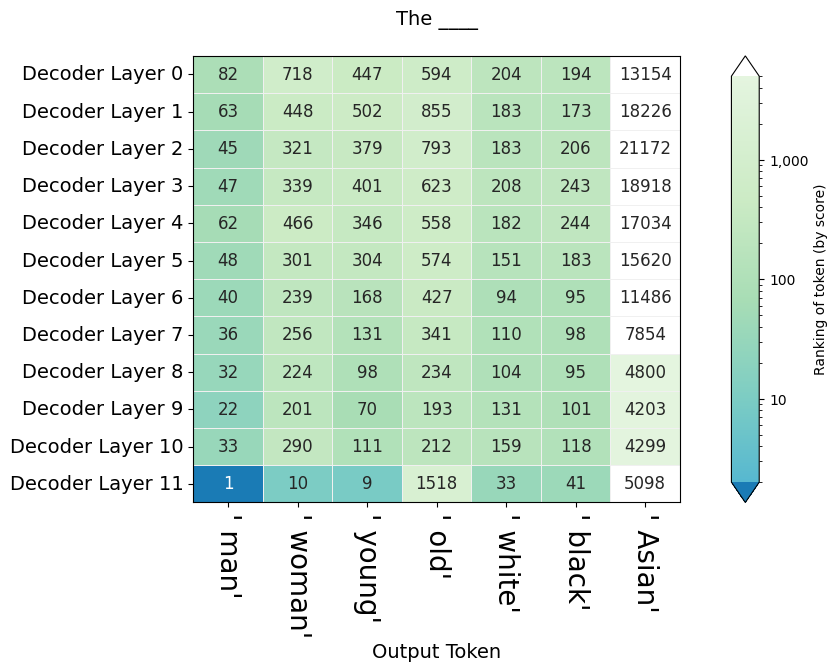

In [ ]:
# Additional professions
professions = ["doctor"]

# Additional attributes
attributes =  [" man", " woman"," young", " old", " white", " black", " Asian"]
attribute_ids = [lm.tokenizer(attribute)['input_ids'][0] for attribute in attributes]

# Additional positions
positions = [4]  # Adjust this based on the number of generated tokens

# Additional models
models = ['distilgpt2', 'gpt2']

for model_name in models:
    lm = ecco.from_pretrained(model_name)
    for profession in professions:
        text = f"The {profession} was a"
        output = lm.generate(text, generate=1, do_sample=False)  # Generate more tokens
        for position in positions:
            output.rankings_watch(watch=attribute_ids, position=position)

# Example 2

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

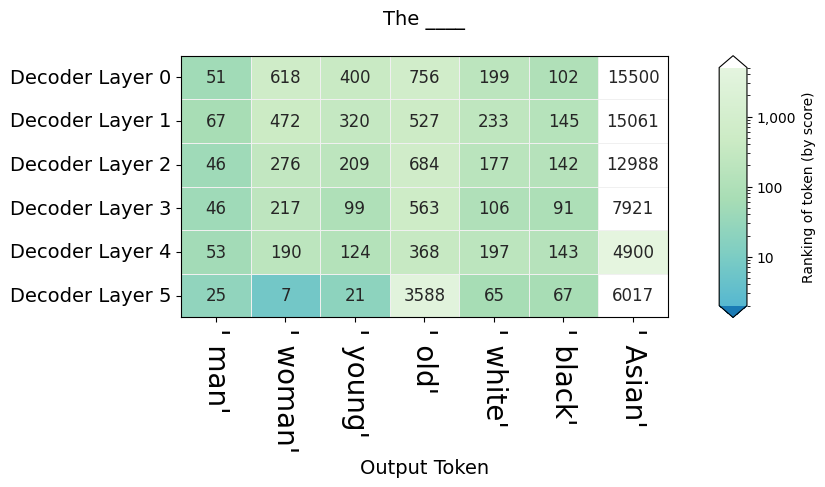

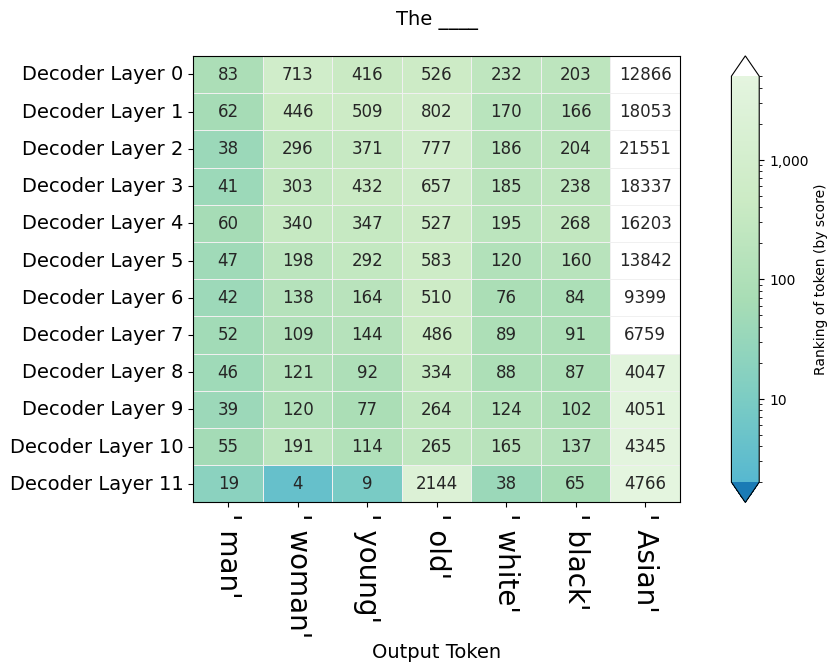

In [ ]:
# Additional professions
professions = ["nurse"]

# Additional attributes
attributes = [" man", " woman", " young", " old", " white", " black", " Asian"]
attribute_ids = [lm.tokenizer(attribute)['input_ids'][0] for attribute in attributes]

# Additional positions
positions = [4]  # Adjust this based on the number of generated tokens

# Additional models
models = ['distilgpt2', 'gpt2']

for model_name in models:
    lm = ecco.from_pretrained(model_name)
    for profession in professions:
        text = f"The {profession} was a"
        output = lm.generate(text, generate=1, do_sample=False)  # Generate more tokens
        for position in positions:
            output.rankings_watch(watch=attribute_ids, position=position)

# Example 3

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

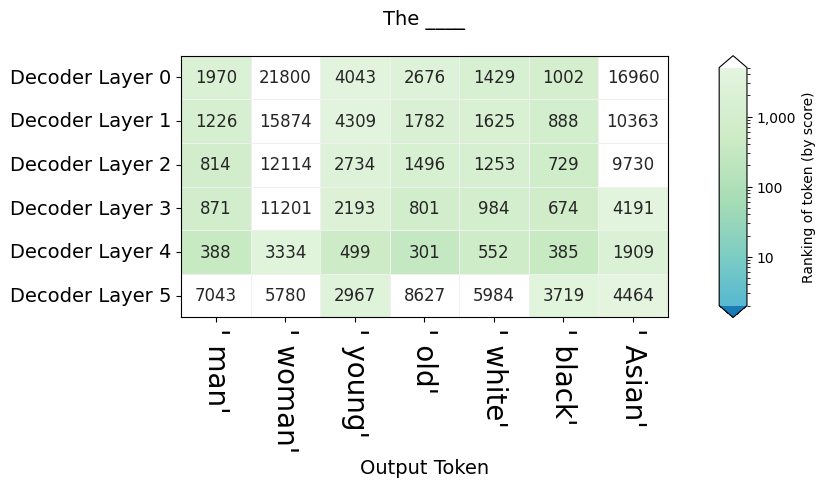

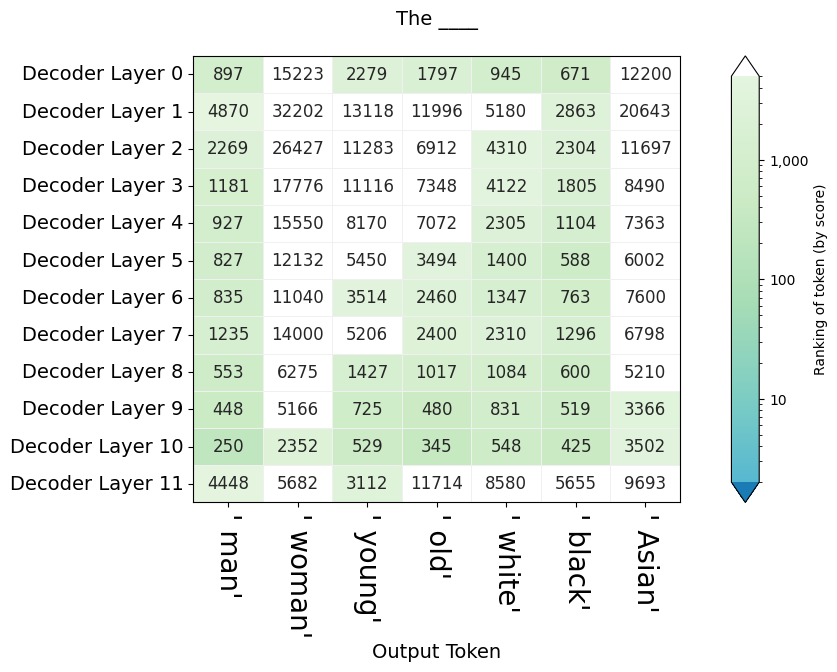

In [ ]:
# Additional professions
professions = ["engineer"]

# Additional attributes
attributes = [" man", " woman", " young", " old", " white", " black", " Asian"]
attribute_ids = [lm.tokenizer(attribute)['input_ids'][0] for attribute in attributes]

# Additional positions
positions = [4]  # Adjust this based on the number of generated tokens

# Additional models
models = ['distilgpt2', 'gpt2']

for model_name in models:
    lm = ecco.from_pretrained(model_name)
    for profession in professions:
        text = f"The {profession} is "
        output = lm.generate(text, generate=5, do_sample=False)  # Generate more tokens
        for position in positions:
            output.rankings_watch(watch=attribute_ids, position=position)

# Example 4

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

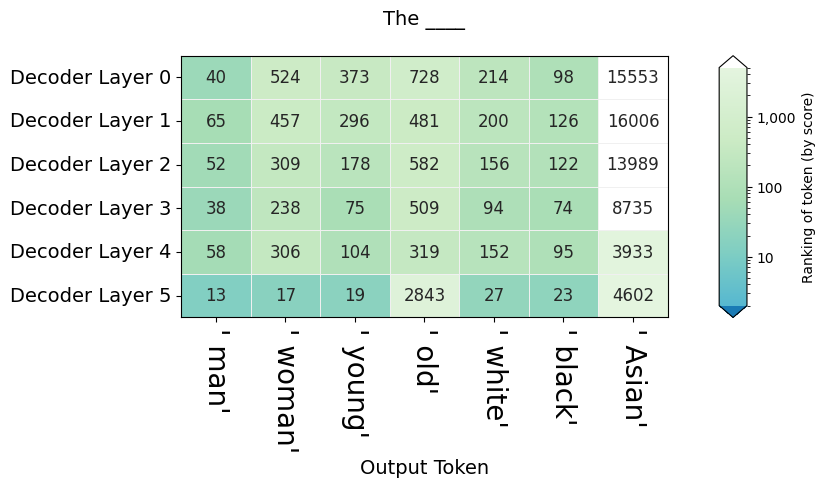

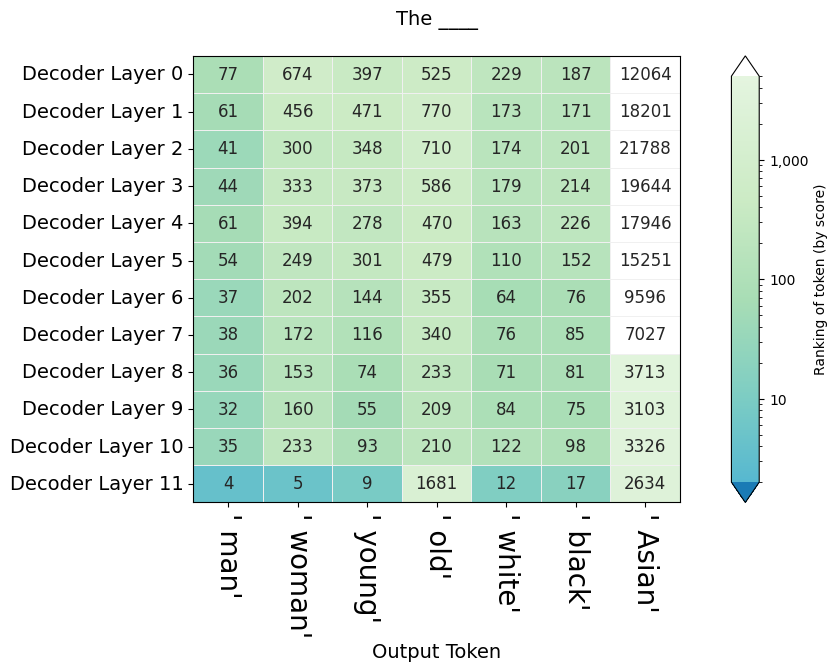

In [ ]:
# Additional professions
professions = ["teacher"]

# Additional attributes
attributes = [" man", " woman", " young", " old", " white", " black", " Asian"]
attribute_ids = [lm.tokenizer(attribute)['input_ids'][0] for attribute in attributes]

# Additional positions
positions = [4]  # Adjust this based on the number of generated tokens

# Additional models
models = ['distilgpt2', 'gpt2']

for model_name in models:
    lm = ecco.from_pretrained(model_name)
    for profession in professions:
        text = f"The {profession} was a"
        output = lm.generate(text, generate=1, do_sample=False)  # Generate more tokens
        for position in positions:
            output.rankings_watch(watch=attribute_ids, position=position)

# Example 5

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

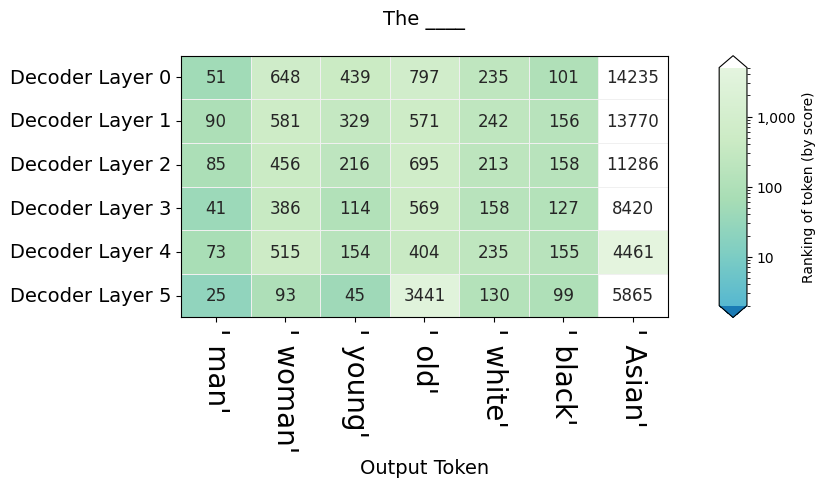

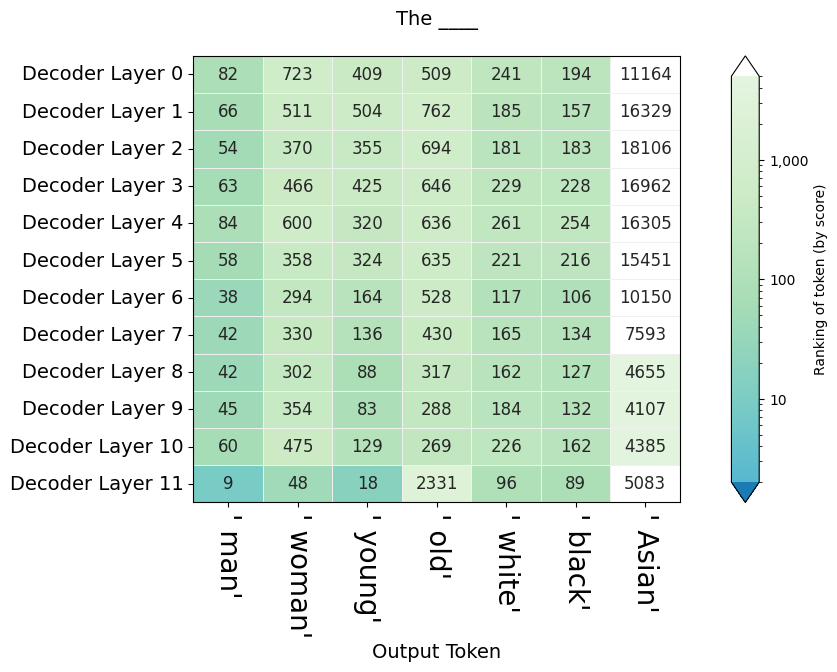

In [ ]:
# Additional professions
professions = ["chef"]

# Additional attributes
attributes = [" man", " woman", " young", " old", " white", " black", " Asian"]
attribute_ids = [lm.tokenizer(attribute)['input_ids'][0] for attribute in attributes]

# Additional positions
positions = [4]  # Adjust this based on the number of generated tokens

# Additional models
models = ['distilgpt2', 'gpt2']

for model_name in models:
    lm = ecco.from_pretrained(model_name)
    for profession in professions:
        text = f"The {profession} was a"
        output = lm.generate(text, generate=1, do_sample=False)  # Generate more tokens
        for position in positions:
            output.rankings_watch(watch=attribute_ids, position=position)

# Example 6

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

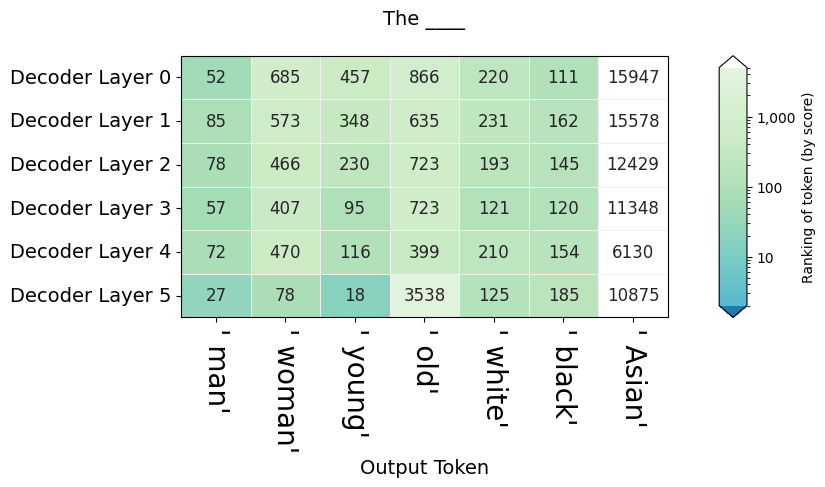

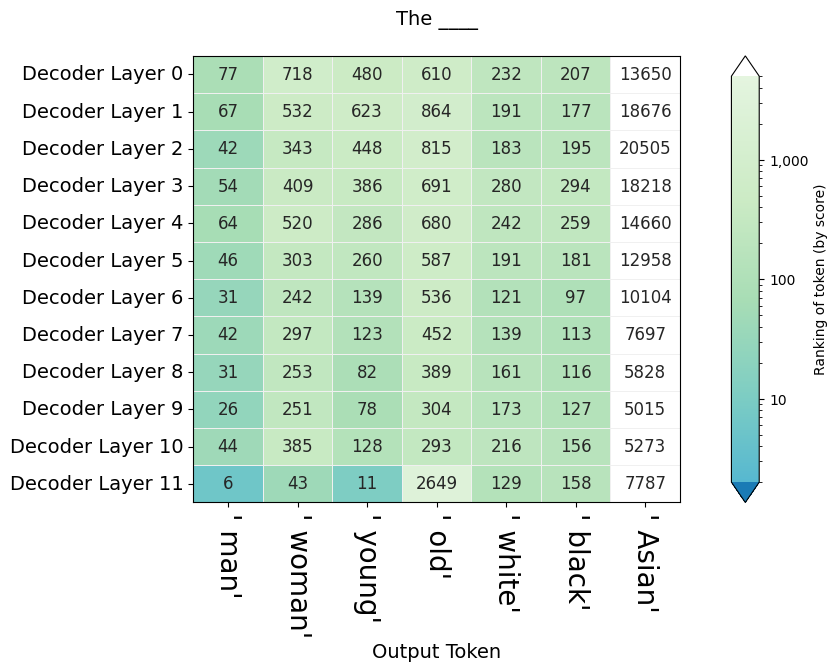

In [ ]:
# Additional professions
professions = ["scientist"]

# Additional attributes
attributes = [" man", " woman", " young", " old", " white", " black", " Asian"]
attribute_ids = [lm.tokenizer(attribute)['input_ids'][0] for attribute in attributes]

# Additional positions
positions = [4]  # Adjust this based on the number of generated tokens

# Additional models
models = ['distilgpt2', 'gpt2']

for model_name in models:
    lm = ecco.from_pretrained(model_name)
    for profession in professions:
        text = f"The {profession} was a"
        output = lm.generate(text, generate=1, do_sample=False)  # Generate more tokens
        for position in positions:
            output.rankings_watch(watch=attribute_ids, position=position)

# Example 7

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

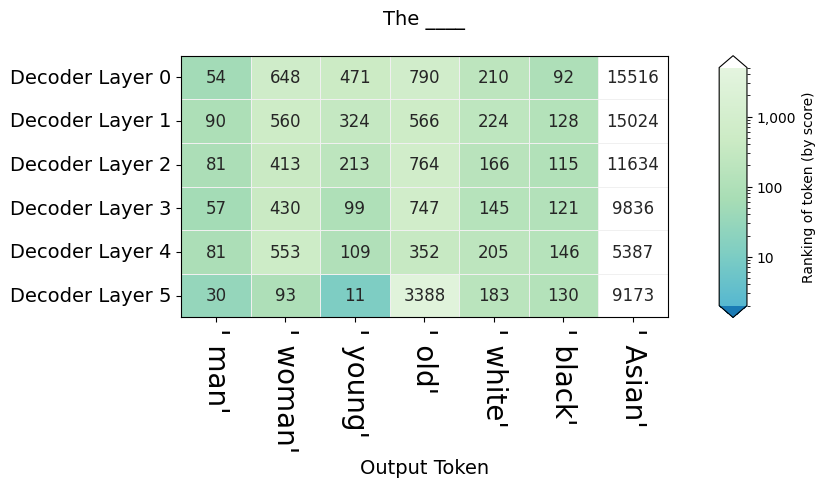

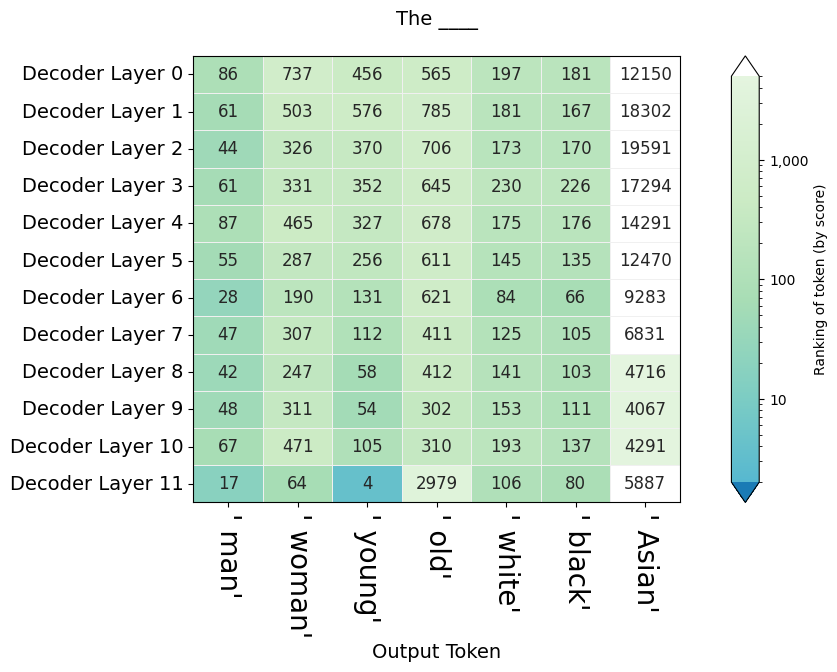

In [ ]:
# Additional professions
professions = ["artist"]

# Additional attributes
attributes = [" man", " woman", " young", " old", " white", " black", " Asian"]
attribute_ids = [lm.tokenizer(attribute)['input_ids'][0] for attribute in attributes]

# Additional positions
positions = [4]  # Adjust this based on the number of generated tokens

# Additional models
models = ['distilgpt2', 'gpt2']

for model_name in models:
    lm = ecco.from_pretrained(model_name)
    for profession in professions:
        text = f"The {profession} was a"
        output = lm.generate(text, generate=1, do_sample=False)  # Generate more tokens
        for position in positions:
            output.rankings_watch(watch=attribute_ids, position=position)

# Example 8

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

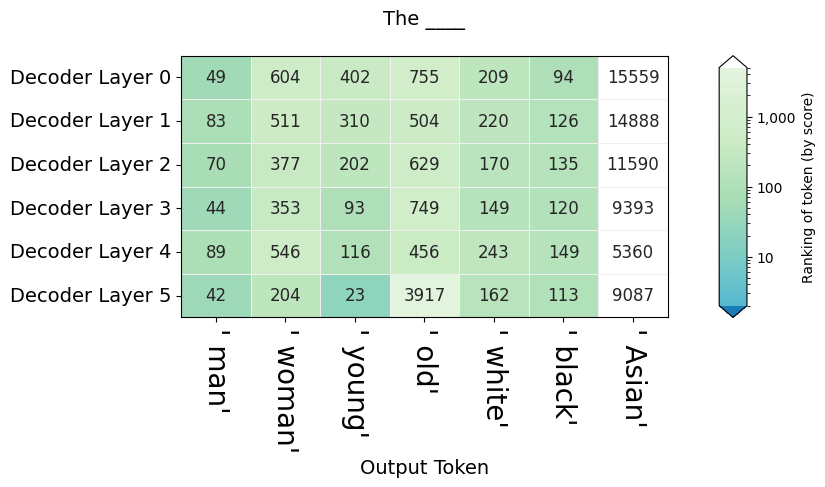

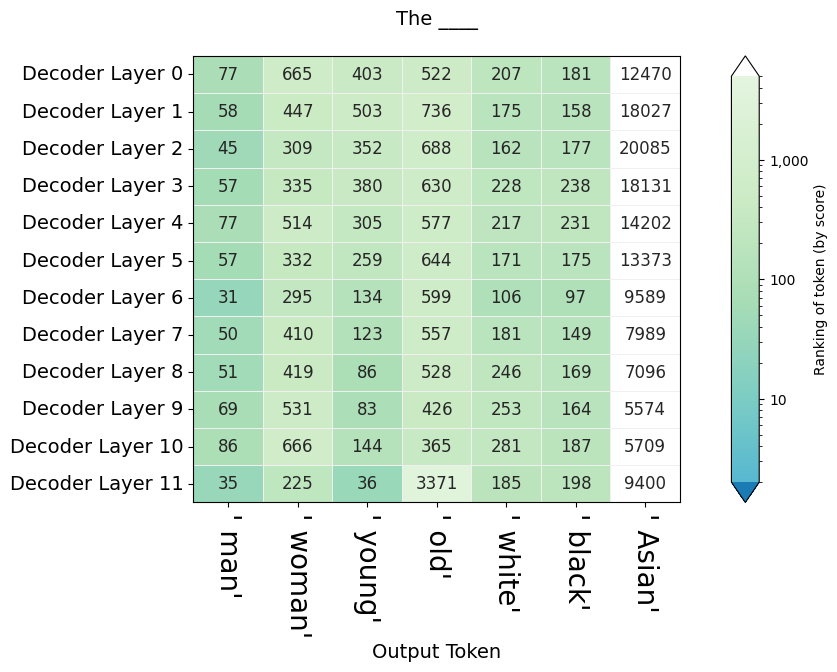

In [ ]:
# Additional professions
professions = ["musician"]

# Additional attributes
attributes = [" man", " woman", " young", " old", " white", " black", " Asian"]
attribute_ids = [lm.tokenizer(attribute)['input_ids'][0] for attribute in attributes]

# Additional positions
positions = [4]  # Adjust this based on the number of generated tokens

# Additional models
models = ['distilgpt2', 'gpt2']

for model_name in models:
    lm = ecco.from_pretrained(model_name)
    for profession in professions:
        text = f"The {profession} was a"
        output = lm.generate(text, generate=1, do_sample=False)  # Generate more tokens
        for position in positions:
            output.rankings_watch(watch=attribute_ids, position=position)


## **more Example in [Github](https://github.com/danadria/Skills-Lab-Introduction-to-Transformers-BERT-and-Explainable-NLP/tree/main)**